<a href="https://colab.research.google.com/github/kjyothiswaroop/COVID-19-Prediction-by-Chest-X-Rays-/blob/master/COVID_19_Detection_using_X_rays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers

In [ ]:
DATASET_PATH = '/content/drive/My Drive/Covid_Data_GradientCrescent/two/train'
test_dir = '/content/drive/My Drive/Covid_Data_GradientCrescent/two/test'

In [ ]:
IMAGE_SIZE = (150,150)
BATCH_SIZE = 10
EPOCHS = 20
lr = 0.05

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 featurewise_center = True,
 featurewise_std_normalization = True,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 zca_whitening = True,
 channel_shift_range = 20,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2,
 fill_mode="constant")
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "training",
 seed=42,
 class_mode="binary",
 
 )
valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "validation",
 seed=42,
 class_mode="binary",
 
 
 )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [ ]:
conv_base = VGG16(include_top=False,weights="imagenet",input_shape=(150,150,3))
conv_base.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [ ]:
model.compile(optimizer=Adam(lr=lr),loss="binary_crossentropy",metrics=['acc'])

In [ ]:
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
result=model.fit_generator(train_batches,
 steps_per_epoch =STEP_SIZE_TRAIN,
 validation_data = valid_batches,
 validation_steps = STEP_SIZE_VALID,
 epochs= EPOCHS,
 )

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
10/10 [==============================] - 23s 2s/step - loss: 36.0032 - acc: 0.5532 - val_loss: 1.4160 - val_acc: 0.8500
Epoch 2/20
10/10 [==============================] - 4s 404ms/step - loss: 2.1291 - acc: 0.7766 - val_loss: 0.0438 - val_acc: 1.0000
Epoch 3/20
10/10 [==============================] - 4s 425ms/step - loss: 1.9104 - acc: 0.7447 - val_loss: 0.1555 - val_acc: 0.9500
Epoch 4/20
10/10 [==============================] - 4s 379ms/step - loss: 1.0852 - acc: 0.8191 - val_loss: 0.3792 - val_acc: 0.9500
Epoch 5/20
10/10 [==============================] - 4s 390ms/step - loss: 0.3684 - acc: 0.8936 - val_loss: 0.4614 - val_acc: 0.9000
Epoch 6/20
10/10 [==============================] - 4s 393ms/step - loss: 0.5667 - acc: 0.8191 - val_loss: 0.5918 - val_acc: 0.8500
Epoch 7/20
10/10 [==============================] - 4s 406ms/step - loss: 0.2463 - acc: 0.9000 - val_loss: 0.5355 - val_acc: 0.8000
Epoch 8/20
10/10 [==============================] - 4s 408ms/step - loss: 0.7

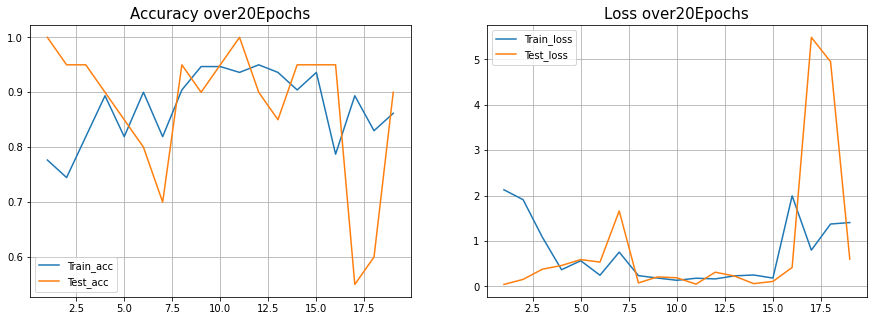

In [ ]:
import matplotlib.pyplot as plt
def plot_acc_loss(result, epochs):
 acc = result.history["acc"]
 loss = result.history["loss"]
 val_acc = result.history["val_acc"]
 val_loss = result.history["val_loss"]
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label="Train_acc")
 plt.plot(range(1,epochs), val_acc[1:], label="Test_acc")
 plt.title("Accuracy over" + str(epochs) +  "Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label="Train_loss")
 plt.plot(range(1,epochs), val_loss[1:], label="Test_loss")
 plt.title("Loss over" + str(epochs) + "Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(result, 20)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(
 test_dir,target_size=IMAGE_SIZE,
 batch_size=1,
 shuffle=False,
 seed=42,
 
 
 class_mode="binary")
eval_generator.reset()
x = model.evaluate_generator(eval_generator,
 steps = np.ceil(len(eval_generator) / BATCH_SIZE),
 use_multiprocessing = False,
 verbose = 1,
 workers=1
 )
print("Test loss:" , x[0])
print("Test accuracy:",x[1])


Found 18 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
2/2 [==============================] - 0s 37ms/step - loss: 9.5546e-06 - acc: 1.0000
Test loss: 9.554591088090092e-06
Test accuracy: 1.0


  18/1000 [..............................] - 1s 29ms/step
Predictions Finished
covid/nejmoa2001191_f3-PA.jpeg


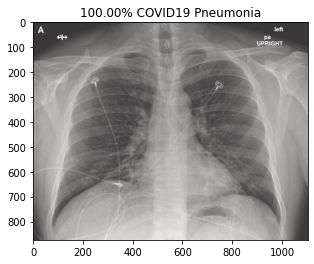

covid/nejmoa2001191_f4.jpeg


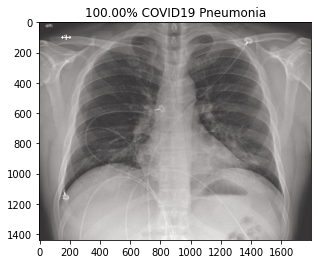

covid/nejmoa2001191_f5-PA.jpeg


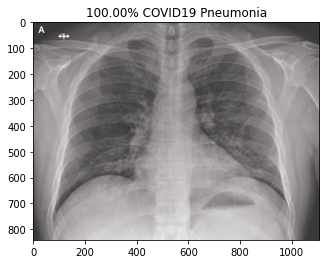

covid/radiol.2020200490.fig3.jpeg


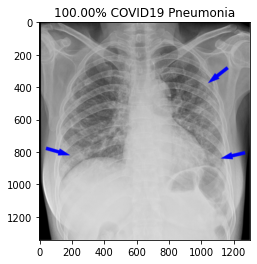

covid/ryct.2020200028.fig1a.jpeg


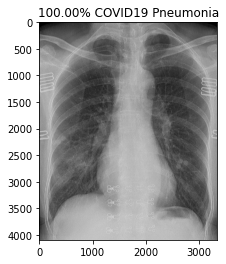

covid/ryct.2020200034.fig2.jpeg


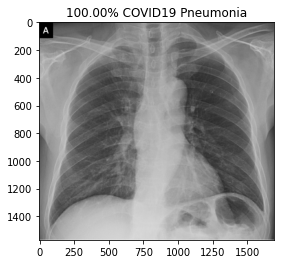

covid/ryct.2020200034.fig5-day0.jpeg


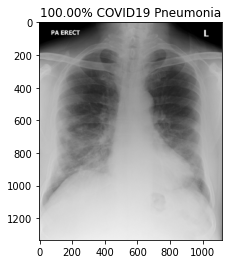

covid/ryct.2020200034.fig5-day4.jpeg


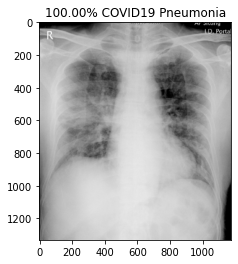

covid/ryct.2020200034.fig5-day7.jpeg


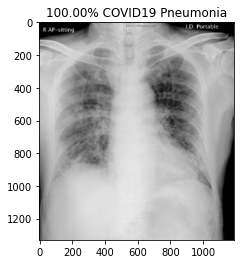

normal/NORMAL2-IM-1385-0001.jpeg


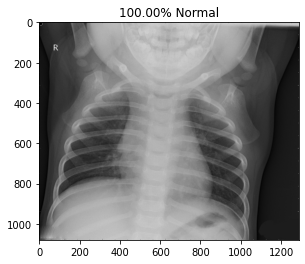

normal/NORMAL2-IM-1396-0001.jpeg


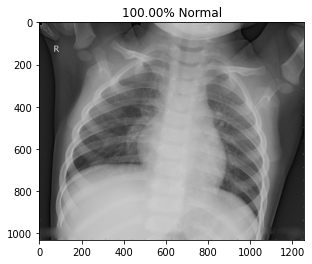

normal/NORMAL2-IM-1400-0001.jpeg


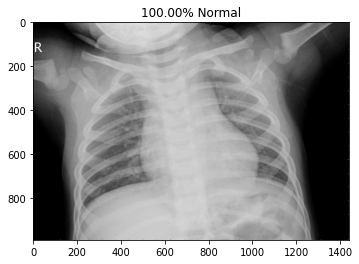

normal/NORMAL2-IM-1401-0001.jpeg


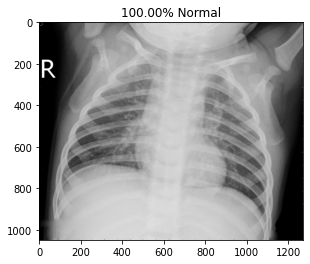

normal/NORMAL2-IM-1406-0001.jpeg


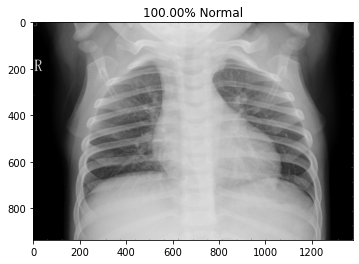

normal/NORMAL2-IM-1412-0001.jpeg


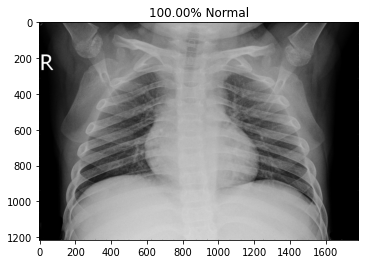

normal/NORMAL2-IM-1419-0001.jpeg


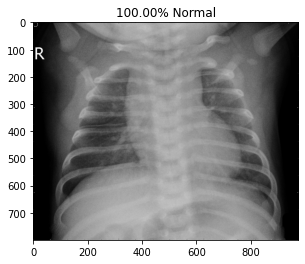

normal/NORMAL2-IM-1422-0001.jpeg


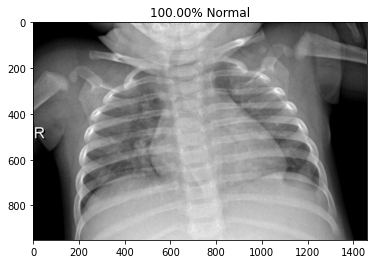

normal/NORMAL2-IM-1423-0001.jpeg


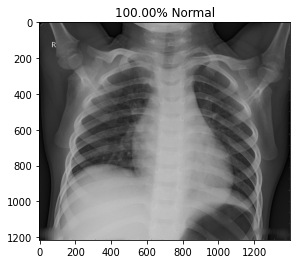

In [ ]:
eval_generator.reset() 
pred = model.predict_generator(eval_generator,1000,verbose=1)
print("Predictions Finished")
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
 image_path = test_dir + "/" +eval_generator.filenames[index]
 image = mpimg.imread(image_path)
 #BGR TO RGB conversion using CV2
 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

 pixels = np.array(image)
 plt.imshow(pixels)
 print(eval_generator.filenames[index])
 if probability > 0.5:
  plt.title("%.2f" % (probability[0]*100) + "% Normal")
 else:
  plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
 plt.show()